In [4]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
!pip install numpy<2

zsh:1: no such file or directory: 2


In [5]:
!pip install kaggle

In [7]:
!aggle datasets download -d imakash3011/customer-personality-analysis


zsh:1: command not found: aggle


In [10]:
!mkdir -p ~/.kaggle
with open("/Users/divayanshisharama/Desktop/Customer_Segementation/kaggle (2).json", "w") as f:
    f.write('{"username":"divyanshi23002","key":"73eb79633d7b20ba5224205c0083df60"}')


In [11]:
!chmod 600 /Users/divayanshisharama/Desktop/Customer_Segementation/kaggle (2).json

zsh:1: no matches found: (2).json


In [12]:
!kaggle datasets download -d imakash3011/customer-personality-analysis
!unzip -q customer-personality-analysis.zip -d Customer_Personality_Analysis


Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
100%|███████████████████████████████████████| 62.0k/62.0k [00:00<00:00, 242kB/s]
100%|███████████████████████████████████████| 62.0k/62.0k [00:00<00:00, 241kB/s]


In [13]:

print("Dataset downloaded and extracted successfully!")

Dataset downloaded and extracted successfully!


In [23]:
data= pd.read_csv('/Users/divayanshisharama/Desktop/Customer_Segementation/Customer_personality_analysis/marketing_campaign.csv', sep='\t')


In [25]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [26]:
print("Missing Value")
print(data.isnull().sum())

Missing Value
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [29]:
data=data.dropna()
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [30]:
numeric_cols= data.select_dtypes(include=[np.number])
print("Numeric Columns Selected for Analysis:")
print(numeric_cols.head())

Numeric Columns Selected for Analysis:
     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
0              546              172  ...                  7             0   
1                6                2  ...                  5             0   
2              127              111  ...                  4             0   
3               20               10  ...                  6             0   
4              118               46  ...                  5             0   

   Accepted

In [31]:
scaler = StandardScaler()
scaler_data=scaler.fit_transform(numeric_cols)

In [32]:
scaler_data=pd.DataFrame(scaler_data, columns=numeric_cols.columns)

In [33]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scaler_data)

In [36]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
print("Explained Varience Ratio:", pca.explained_variance_ratio_)

Explained Varience Ratio: [0.27258972 0.08475611]


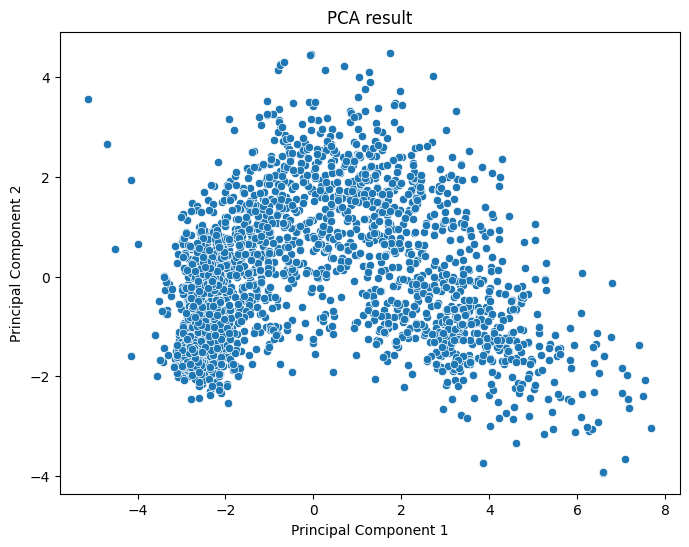

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA result")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [39]:
inertia=[]
for k in range (1,11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    

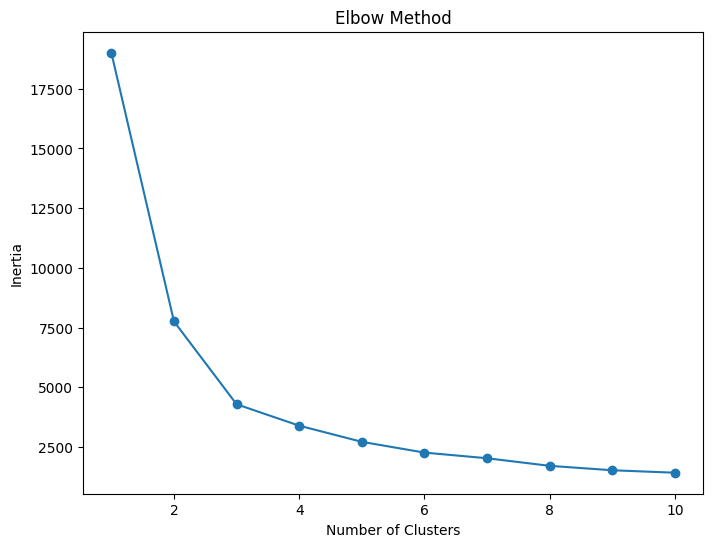

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

In [42]:
pca_df['Cluster'] = kmeans_labels

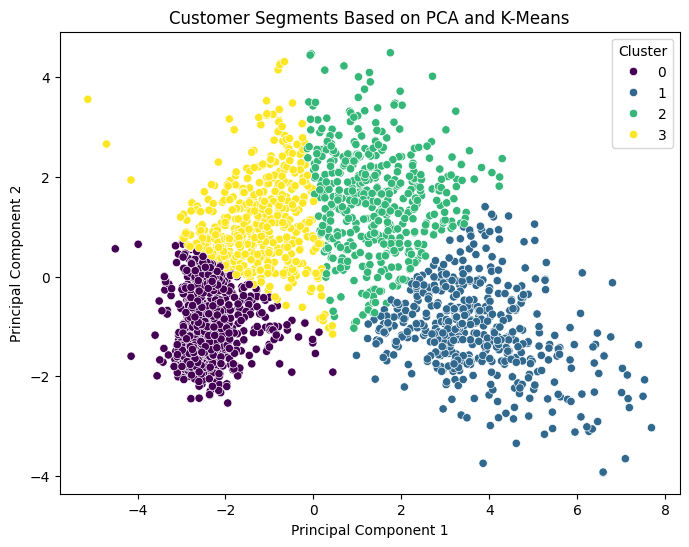

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments Based on PCA and K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [45]:
data['Cluster'] = kmeans_labels


In [46]:
numeric_columns = data.select_dtypes(include=['number']).columns

In [48]:
cluster_insights = data.groupby('Cluster')[numeric_columns].mean()

print("Cluster Insights:")
print(cluster_insights)

Cluster Insights:
                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5696.064433  1974.644330  32274.920103  0.854381  0.291237   
1        5648.930041  1969.098765  78893.864198  0.034979  0.076132   
2        5503.061702  1963.885106  63225.285106  0.110638  0.878723   
3        5437.657025  1963.995868  46851.795455  0.510331  0.917355   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        47.963918   26.805412   4.747423        19.158505         6.831186   
1        49.240741  631.306584  67.987654       484.368313       102.393004   
2        49.238298  559.378723  37.210638       194.144681        46.553191   
3        50.245868  176.774793   8.657025        58.977273        13.349174   

         ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
Cluster 